# Black Scholes Vanilla European Call Prices

## Imports

In [1]:
import datetime
y=datetime.datetime.now()
print(y.strftime("%H:%M:%S:%f %A %d %B %Y %z" ))

19:36:57:341964 Saturday 15 December 2018 


In [2]:
import os
print("Current working directory",os.getcwd())

Current working directory C:\Users\Peter


In [3]:
import numpy as np
np.__version__

'1.15.4'

In [4]:
import pandas as pd
pd.__version__

'0.23.4'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [6]:
from math import log, sqrt, exp
from scipy import stats

In [7]:
import decimal
from decimal import Decimal
decimal.getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [8]:
decimal.getcontext().prec=112
#increase the number precision

## Functions

In [198]:
'''
Black-Scholes vanilla European call price function, with the default values as shown in the example in Hull (2009)
'''

def bs(S=42,K=40,r=0.1,sigma=0.2,T=0.5):
    if ( np.any(S)==0 ):
        return 0
    elif (np.any(K)==0):
        return S    
    else:    
        d1 = (np.log(S/K)  +   (r+(np.square(sigma)/2) )* T )  / (sigma*np.sqrt(T))  
        d2 = d1 - (sigma * np.sqrt(T) )   
        c = S*stats.norm.cdf(d1, 0.0, 1.0)-  K*np.exp(-r*T)*stats.norm.cdf(d2, 0.0, 1.0)
        return c  

In [723]:
'''
Black-Scholes vanilla European call price function, with the default values as shown in the example in Hull (2009)
'''

def bsDecimal(S=42,K=40,r=0.1,sigma=0.2,T=0.5):
    
    S=Decimal(S)
    K=Decimal(K)
    r=Decimal(r)
    sigma=Decimal(sigma)
    T=Decimal(T)
    
    if ( np.any(S)==0 ):
        return 0
    elif (np.any(K)==0):
        return S    
    else:    
        d1 = (  ( Decimal (S/K) ).ln()  +   Decimal ( (r+(np.square(sigma)/2) )* T ) )  / Decimal ( (sigma*np.sqrt(T)) ) 
        d2 = d1 - Decimal ( (sigma * np.sqrt(T) )   )
        
        '''
        print(d1)
        print(round(d1,20))
        print(float(round(d1,20)))
        print()
        print(d2)
        print(round(d2,20))
        print(float(round(d2,20)))
        '''
        
        #c = Decimal( S* Decimal( stats.norm.cdf(d1, 0.0, 1.0) )  )\
        #            - Decimal (K * (  np.exp(-r*T)*Decimal(stats.norm.cdf(d2, 0.0, 1.0))) )
        
        round_d1=float(round(d1,20))
        print(type(round_d1))
        round_d2=float(round(d2,20))
        print(type(round_d1))
        
        cdf_d1=Decimal ( stats.norm.cdf(round_d1, 0.0, 1.0) ) 
        cdf_d2=Decimal ( stats.norm.cdf(round_d2, 0.0, 1.0) )
        
        c = Decimal (
        
        (
            S*cdf_d1 
        )
            -
        (
            K*np.exp(-r*T)*cdf_d2
        )
        )
        
        return c  

In [724]:
x=Decimal(42)

In [725]:
bsDecimal(S=x)

0.7692626281060313656830440230974943016062895048235545840253611908471661445806080487533610363914366751111216339498
0.76926262810603136568
0.7692626281060314

0.6278412718687218529524128572576491967824104574680423195905766230974471592320625249514702647735395688668503525272
0.62784127186872185295
0.6278412718687219
<class 'float'>
<class 'float'>


Decimal('4.75942239287153143007131791898744713680478009470034327250796964568769722921726499194780886164081340434109854130')

In [702]:
y=float(10)

In [700]:
x+Decimal(y)

Decimal('52')

In [705]:
type(y)

float

In [726]:
bs(S=42)

4.759422392871532

In [195]:
#Function bs() typically produces the Euro call value of 4.759422392871532

In [38]:
bs(K=0)

42

In [13]:
type(y)

datetime.datetime

Hull's value for the default is 4.759, same as the output of the bs function with the default parameters

In [14]:
'''
BSM Call Function taken from Hilpisch (2014), Chapter 10
'''
def bsm_call_value(S0, K, T, r, sigma):
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)
             - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

# stats.norm.cdf --> cumulative distribution function
#                    for normal distribution

In [15]:
bsm_call_value(42,40,0.5,0.1,0.2)

4.759422392871532

## Parameters for the model

In [750]:
NUMBER_S=100

In [751]:
INCREMENT_S=( 1/1000 ) 

In [752]:
INCREMENT_S

0.001

In [753]:
for m in np.arange (1, 26, 0.1):
    print("{:1.1f} \t {:3.6f}".format(m,bs(m)))    

1.0 	 0.000000
1.1 	 0.000000
1.2 	 0.000000
1.3 	 0.000000
1.4 	 0.000000
1.5 	 0.000000
1.6 	 0.000000
1.7 	 0.000000
1.8 	 0.000000
1.9 	 0.000000
2.0 	 0.000000
2.1 	 0.000000
2.2 	 0.000000
2.3 	 0.000000
2.4 	 0.000000
2.5 	 0.000000
2.6 	 0.000000
2.7 	 0.000000
2.8 	 0.000000
2.9 	 0.000000
3.0 	 0.000000
3.1 	 0.000000
3.2 	 0.000000
3.3 	 0.000000
3.4 	 0.000000
3.5 	 0.000000
3.6 	 0.000000
3.7 	 0.000000
3.8 	 0.000000
3.9 	 0.000000
4.0 	 0.000000
4.1 	 0.000000
4.2 	 0.000000
4.3 	 0.000000
4.4 	 0.000000
4.5 	 0.000000
4.6 	 0.000000
4.7 	 0.000000
4.8 	 0.000000
4.9 	 0.000000
5.0 	 0.000000
5.1 	 0.000000
5.2 	 0.000000
5.3 	 0.000000
5.4 	 0.000000
5.5 	 0.000000
5.6 	 0.000000
5.7 	 0.000000
5.8 	 0.000000
5.9 	 0.000000
6.0 	 0.000000
6.1 	 0.000000
6.2 	 0.000000
6.3 	 0.000000
6.4 	 0.000000
6.5 	 0.000000
6.6 	 0.000000
6.7 	 0.000000
6.8 	 0.000000
6.9 	 0.000000
7.0 	 0.000000
7.1 	 0.000000
7.2 	 0.000000
7.3 	 0.000000
7.4 	 0.000000
7.5 	 0.000000
7.6 	 0.00

In [754]:
optionS=np.array(np.arange(1,NUMBER_S,INCREMENT_S))

In [755]:
optionS

array([ 1.   ,  1.001,  1.002, ..., 99.997, 99.998, 99.999])

In [736]:
print("{:2.100}".format(optionS[6]/3))

0.3353333333333333333749666967567767035992195208867390950520833333333333333333333333333333333333333333


In [737]:
def myFunction(x):
    return (1+ ( 2*x) )

In [740]:
optionValues=bs(optionS)

AttributeError: 'float' object has no attribute 'log'

In [490]:
myFunction(optionS)

array([  3.   ,   3.002,   3.004, ..., 200.994, 200.996, 200.998])

In [491]:
optionValues

array([8.92286239e-148, 1.07133603e-147, 1.28601587e-147, ...,
       6.19478230e+001, 6.19488230e+001, 6.19498230e+001])

In [492]:
optionS.shape

(99000,)

In [493]:
optionValues.shape

(99000,)

In [494]:
optionArray=np.array((optionS,optionValues))

In [495]:
optionArray.shape

(2, 99000)

In [496]:
optionArray=optionArray.T

In [497]:
type(optionArray)

numpy.ndarray

In [498]:
optionDF=pd.DataFrame(data=optionArray,columns=["S","Value"])

In [499]:
optionDF['S']

0         1.000
1         1.001
2         1.002
3         1.003
4         1.004
5         1.005
6         1.006
7         1.007
8         1.008
9         1.009
10        1.010
11        1.011
12        1.012
13        1.013
14        1.014
15        1.015
16        1.016
17        1.017
18        1.018
19        1.019
20        1.020
21        1.021
22        1.022
23        1.023
24        1.024
25        1.025
26        1.026
27        1.027
28        1.028
29        1.029
          ...  
98970    99.970
98971    99.971
98972    99.972
98973    99.973
98974    99.974
98975    99.975
98976    99.976
98977    99.977
98978    99.978
98979    99.979
98980    99.980
98981    99.981
98982    99.982
98983    99.983
98984    99.984
98985    99.985
98986    99.986
98987    99.987
98988    99.988
98989    99.989
98990    99.990
98991    99.991
98992    99.992
98993    99.993
98994    99.994
98995    99.995
98996    99.996
98997    99.997
98998    99.998
98999    99.999
Name: S, Length: 99000, 

In [415]:
optionDF['Value']

0        8.922862e-148
1        1.071336e-147
2        1.286016e-147
3        1.543357e-147
4        1.851765e-147
5        2.221289e-147
6        2.663939e-147
7        3.194065e-147
8        3.828808e-147
9        4.588641e-147
10       5.498010e-147
11       6.586095e-147
12       7.887725e-147
13       9.444458e-147
14       1.130587e-146
15       1.353110e-146
16       1.619064e-146
17       1.936857e-146
18       2.316507e-146
19       2.769954e-146
20       3.311421e-146
21       3.957852e-146
22       4.729422e-146
23       5.650153e-146
24       6.748639e-146
25       8.058909e-146
26       9.621451e-146
27       1.148443e-145
28       1.370512e-145
29       1.635163e-145
             ...      
98970     6.192082e+01
98971     6.192182e+01
98972     6.192282e+01
98973     6.192382e+01
98974     6.192482e+01
98975     6.192582e+01
98976     6.192682e+01
98977     6.192782e+01
98978     6.192882e+01
98979     6.192982e+01
98980     6.193082e+01
98981     6.193182e+01
98982     6

In [500]:
optionDF.shape

(99000, 2)

In [501]:
underlying=(42/INCREMENT_S)

In [502]:
lower=int(underlying-(20/INCREMENT_S))

In [503]:
underlying

42000.0

In [504]:
upper=int(underlying+(20/INCREMENT_S))

In [505]:
5/INCREMENT_S

5000.0

In [506]:
upper

62000

In [507]:
lower

22000

In [539]:
optionDF[optionDF['S']==1.0]

,S,Value
0,1.0,8.922862e-148


In [540]:
optionDF

,S,Value
0,1.000,8.922862e-148
1,1.001,1.071336e-147
2,1.002,1.286016e-147
3,1.003,1.543357e-147
4,1.004,1.851765e-147
5,1.005,2.221289e-147
6,1.006,2.663939e-147
7,1.007,3.194065e-147
8,1.008,3.828808e-147
9,1.009,4.588641e-147


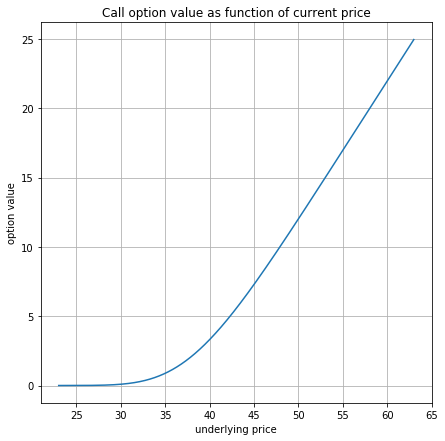

In [541]:
plt.rcParams['figure.figsize'] = [7, 7] # This controls the picture size
fig, ax = plt.subplots()
ax.plot(optionDF['S'][lower:upper],optionDF['Value'][lower:upper])
#ax.plot()
ax.set(xlabel='underlying price', ylabel='option value',
       title='Call option value as function of current price')
ax.grid()

fig.savefig("test.png")
plt.show()

In [632]:
#optionDF.loc[['S']==42.0 ] #    [(S=37):(S=47)]

optionDF.loc[round(optionDF['S'],5)==42]

,S,Value
41000,42.0,4.759422


In [573]:
optionDF.loc[optionDF['S']==1]

,S,Value
0,1.0,8.922862e-148


In [542]:
optionDF.index

RangeIndex(start=0, stop=99000, step=1)

In [578]:
optionDF.columns

Index(['S', 'Value'], dtype='object')

In [589]:
optionDF.iloc[41000]['Value']

4.759422392868014

In [627]:
optionDF.iloc[41000]['S']

41.99999999999548

In [639]:
optionDF.loc[optionDF.S==1]

,S,Value
0,1.0,8.922862e-148


In [599]:
optionDF['Value']

0        8.922862e-148
1        1.071336e-147
2        1.286016e-147
3        1.543357e-147
4        1.851765e-147
5        2.221289e-147
6        2.663939e-147
7        3.194065e-147
8        3.828808e-147
9        4.588641e-147
10       5.498010e-147
11       6.586095e-147
12       7.887725e-147
13       9.444458e-147
14       1.130587e-146
15       1.353110e-146
16       1.619064e-146
17       1.936857e-146
18       2.316507e-146
19       2.769954e-146
20       3.311421e-146
21       3.957852e-146
22       4.729422e-146
23       5.650153e-146
24       6.748639e-146
25       8.058909e-146
26       9.621451e-146
27       1.148443e-145
28       1.370512e-145
29       1.635163e-145
             ...      
98970     6.192082e+01
98971     6.192182e+01
98972     6.192282e+01
98973     6.192382e+01
98974     6.192482e+01
98975     6.192582e+01
98976     6.192682e+01
98977     6.192782e+01
98978     6.192882e+01
98979     6.192982e+01
98980     6.193082e+01
98981     6.193182e+01
98982     6

In [635]:
optionDF.loc[optionDF[S>41.000]]['Value']

KeyError: True

In [543]:
optionDF.dtypes

S        float64
Value    float64
dtype: object

In [546]:
optionDF

,S,Value
0,1.000,8.922862e-148
1,1.001,1.071336e-147
2,1.002,1.286016e-147
3,1.003,1.543357e-147
4,1.004,1.851765e-147
5,1.005,2.221289e-147
6,1.006,2.663939e-147
7,1.007,3.194065e-147
8,1.008,3.828808e-147
9,1.009,4.588641e-147
